# Portfolio Theory

## Imports

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

## Load Data

In [7]:
stocks = pd.read_csv("data/index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])
stocks

Price       Adj Close                                                 \
Ticker           AMZN          BA         DIS         IBM         KO   
Date                                                                   
2014-01-02  19.898500  116.807945   69.335960  112.504295  28.724297   
2014-01-03  19.822001  117.619881   69.190521  113.177422  28.583017   
2014-01-06  19.681499  118.295090   68.926888  112.789345  28.448795   
2014-01-07  19.901501  120.089897   69.399590  115.039040  28.533552   
2014-01-08  20.096001  120.354843   68.381424  113.983925  28.215658   
...               ...         ...         ...         ...        ...   
2018-12-21  68.872498  295.930267  101.705254   80.204346  39.488831   
2018-12-24  67.197998  285.834351   97.928635   77.767975  38.152325   
2018-12-26  73.544998  305.044800  103.276405   80.529648  38.965843   
2018-12-27  73.082001  308.163910  103.949753   82.257500  39.455616   
2018-12-28  73.901001  307.425415  104.710938   81.715294  39.181671   

Price                      Close                                      ...  \
Ticker           MSFT       AMZN          BA         DIS         IBM  ...   
Date                                                                  ...   
2014-01-02  31.058558  19.898500  136.669998   76.269997  177.370941  ...   
2014-01-03  30.849625  19.822001  137.619995   76.110001  178.432129  ...   
2014-01-06  30.197691  19.681499  138.410004   75.820000  177.820267  ...   
2014-01-07  30.431709  19.901501  140.509995   76.339996  181.367111  ...   
2014-01-08  29.888426  20.096001  140.820007   75.220001  179.703629  ...   
...               ...        ...         ...         ...         ...  ...   
2018-12-21  92.586563  68.872498  304.549988  104.220001  106.061188  ...   
2018-12-24  88.722107  67.197998  294.160004  100.349998  102.839386  ...   
2018-12-26  94.782715  73.544998  313.929993  105.830002  106.491394  ...   
2018-12-27  95.367104  73.082001  317.140015  106.519997  108.776291  ...   
2018-12-28  94.622482  73.901001  316.380005  107.300003  108.059273  ...   

Price             Open                                        Volume           \
Ticker             DIS         IBM         KO        MSFT       AMZN       BA   
Date                                                                            
2014-01-02   76.040001  178.977051  41.119999   37.349998   42756000  3366700   
2014-01-03   76.300003  177.657745  40.680000   37.200001   44204000  3177400   
2014-01-06   76.529999  178.919693  40.480000   36.849998   63412000  4196500   
2014-01-07   76.120003  178.193115  40.480000   36.330002   38320000  4238500   
2014-01-08   76.129997  181.003830  40.439999   36.000000   46330000  4236100   
...                ...         ...        ...         ...        ...      ...   
2018-12-21  106.470001  107.552582  47.259998  101.629997  272806000  7641700   
2018-12-24  103.230003  105.066925  47.619999   97.680000  144400000  3435300   
2018-12-26  100.489998  103.250481  45.880001   95.139999  208236000  4843400   
2018-12-27  104.410004  105.152962  46.740002   99.300003  194440000  4341100   
2018-12-28  107.279999  109.196938  47.889999  102.089996  176580000  3725200   

Price                                                
Ticker           DIS       IBM        KO       MSFT  
Date                                                 
2014-01-02   5200900   4755639  12698600   30632200  
2014-01-03   4060700   4250107  10403400   31134800  
2014-01-06   6816200   4254919  11036300   43603700  
2014-01-07   4494900   6205186  11872300   35802800  
2014-01-08  10900300   4815470  15339600   59971700  
...              ...       ...       ...        ...  
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[1257 rows x 36 colu

In [8]:
stocks = stocks["Adj Close"].copy()
stocks

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.898500,116.807945,69.335960,112.504295,28.724297,31.058558
2014-01-03,19.822001,117.619881,69.190521,113.177422,28.583017,30.849625
2014-01-06,19.681499,118.295090,68.926888,112.789345,28.448795,30.197691
2014-01-07,19.901501,120.089897,69.399590,115.039040,28.533552,30.431709
2014-01-08,20.096001,120.354843,68.381424,113.983925,28.215658,29.888426
...,...,...,...,...,...,...
2018-12-21,68.872498,295.930267,101.705254,80.204346,39.488831,92.586563
2018-12-24,67.197998,285.834351,97.928635,77.767975,38.152325,88.722107
2018-12-26,73.544998,305.044800,103.276405,80.529648,38.965843,94.782715


In [9]:
stocks.to_csv("data/port_stocks.csv")

## Creating an Equal Weighted Portfolio

In [11]:
ret = stocks.pct_change().dropna()
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064
...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0184,0.0006,-0.0323
2018-12-24,-0.0243,-0.0341,-0.0371,-0.0304,-0.0338,-0.0417
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0683


In [12]:
ret.mean(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [13]:
no_assets = len(stocks.columns)
no_assets

6

In [14]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [18]:
ret.dot(weights)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [19]:
ret["EWP"] = ret.dot(weights)
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0008
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0106
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0020
...,...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0184,0.0006,-0.0323,-0.0267
2018-12-24,-0.0243,-0.0341,-0.0371,-0.0304,-0.0338,-0.0417,-0.0336
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0683,0.0569


In [21]:
summary = ret.agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Ticker,,
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [27]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

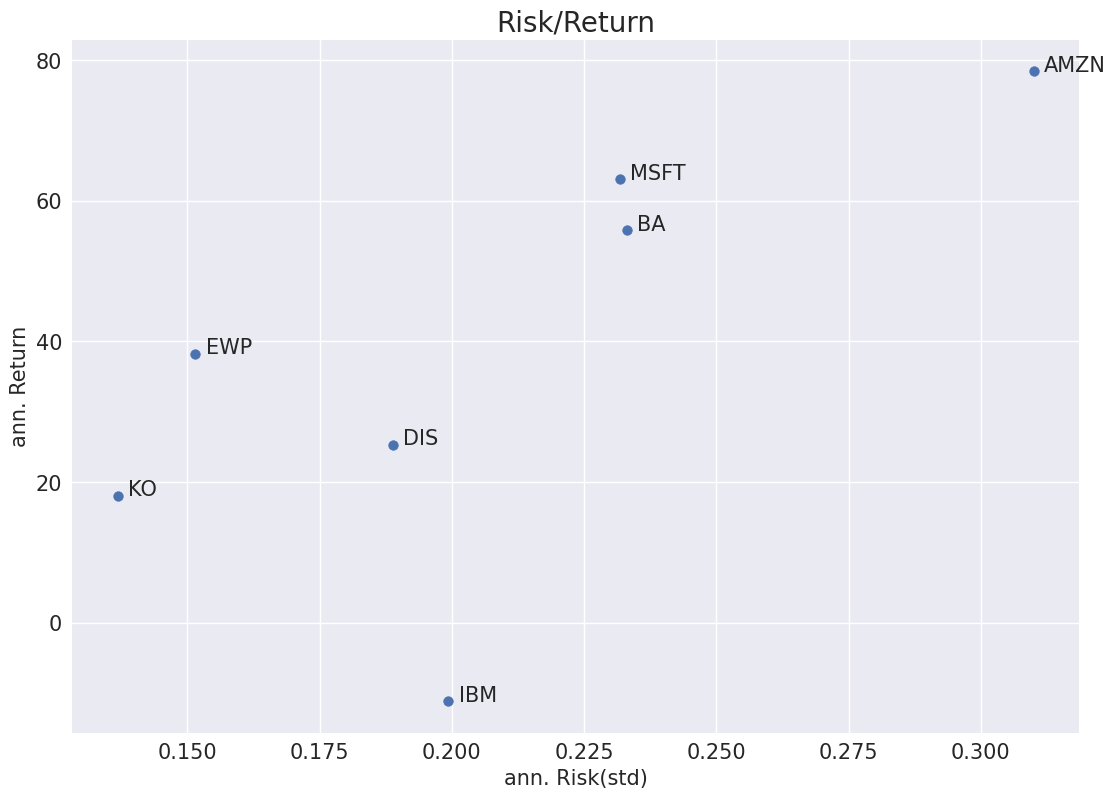

In [28]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [29]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating Many Random Portfolios

In [30]:
stocks = pd.read_csv("data/port_stocks.csv", parse_dates= ["Date"], index_col= "Date")
stocks

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.8985,116.8079,69.3360,112.5043,28.7243,31.0586
2014-01-03,19.8220,117.6199,69.1905,113.1774,28.5830,30.8496
2014-01-06,19.6815,118.2951,68.9269,112.7893,28.4488,30.1977
2014-01-07,19.9015,120.0899,69.3996,115.0390,28.5336,30.4317
2014-01-08,20.0960,120.3548,68.3814,113.9839,28.2157,29.8884
...,...,...,...,...,...,...
2018-12-21,68.8725,295.9303,101.7053,80.2043,39.4888,92.5866
2018-12-24,67.1980,285.8344,97.9286,77.7680,38.1523,88.7221
2018-12-26,73.5450,305.0448,103.2764,80.5296,38.9658,94.7827


In [31]:
ret = stocks.pct_change().dropna()
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064
...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0184,0.0006,-0.0323
2018-12-24,-0.0243,-0.0341,-0.0371,-0.0304,-0.0338,-0.0417
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0683


In [32]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317


In [33]:
num_attributes = len(stocks.columns)
num_portfolios = 10000

In [55]:
np.random.random(num_attributes * num_portfolios).reshape(num_portfolios, num_attributes)

array([[0.85794372, 0.43829028, 0.03844023, 0.71915431, 0.54392117,
        0.38352292],
       [0.19436871, 0.23866547, 0.13907645, 0.6686182 , 0.46979142,
        0.76412654],
       [0.72430504, 0.16347483, 0.08071075, 0.37281621, 0.36236481,
        0.57952969],
       ...,
       [0.92653776, 0.59949235, 0.1233871 , 0.47374004, 0.53107153,
        0.13204603],
       [0.03543733, 0.00737568, 0.68504724, 0.45095976, 0.1045585 ,
        0.18157977],
       [0.14803555, 0.07695565, 0.45043388, 0.42249027, 0.48518397,
        0.74774036]])

In [56]:
np.random.seed(123)
matrix = np.random.random(num_attributes * num_portfolios).reshape(num_portfolios, num_attributes)
matrix

array([[6.96469186e-01, 2.86139335e-01, 2.26851454e-01, 5.51314769e-01,
        7.19468970e-01, 4.23106460e-01],
       [9.80764198e-01, 6.84829739e-01, 4.80931901e-01, 3.92117518e-01,
        3.43178016e-01, 7.29049707e-01],
       [4.38572245e-01, 5.96778966e-02, 3.98044255e-01, 7.37995406e-01,
        1.82491730e-01, 1.75451756e-01],
       ...,
       [1.54233601e-01, 7.01517016e-01, 1.88272835e-04, 3.16434625e-03,
        1.48153795e-01, 2.36841411e-01],
       [9.81419821e-01, 1.77248729e-01, 5.26242589e-01, 2.01518574e-01,
        5.34389538e-01, 4.38449038e-01],
       [7.06401840e-01, 5.68738882e-01, 2.55139068e-01, 3.55529043e-02,
        3.93868332e-01, 1.32760524e-01]])

In [57]:
weights = matrix / matrix.sum(axis=1, keepdims=True)
weights

array([[2.39884666e-01, 9.85548824e-02, 7.81343758e-02, 1.89889175e-01,
        2.47806474e-01, 1.45730427e-01],
       [2.71614294e-01, 1.89657765e-01, 1.33189995e-01, 1.08593608e-01,
        9.50402295e-02, 2.01904109e-01],
       [2.20141008e-01, 2.99552753e-02, 1.99798014e-01, 3.70436238e-01,
        9.16015868e-02, 8.80678770e-02],
       ...,
       [1.23972184e-01, 5.63875809e-01, 1.51332747e-04, 2.54348542e-03,
        1.19085267e-01, 1.90371922e-01],
       [3.43241600e-01, 6.19909399e-02, 1.84047993e-01, 7.04790714e-02,
        1.86897305e-01, 1.53343091e-01],
       [3.37593701e-01, 2.71803743e-01, 1.21932500e-01, 1.69909475e-02,
        1.88232052e-01, 6.34470553e-02]])

In [58]:
weights.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [63]:
portfolio_returns = ret.dot(weights.T)
portfolio_returns

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0023,0.0001,-0.0012,...,0.0010,-0.0029,0.0003,-0.0003,-0.0001,0.0002,-0.0005,0.0016,-0.0028,-0.0009
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0058,-0.0079,-0.0046,-0.0024,-0.0082,-0.0055,-0.0062,...,-0.0029,-0.0055,-0.0040,-0.0043,-0.0052,-0.0064,-0.0065,-0.0022,-0.0071,-0.0036
2014-01-07,0.0104,0.0108,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0100,...,0.0118,0.0079,0.0119,0.0103,0.0117,0.0121,0.0122,0.0118,0.0092,0.0101
2014-01-08,-0.0057,-0.0045,-0.0067,-0.0077,-0.0055,-0.0088,-0.0061,-0.0102,-0.0060,-0.0087,...,-0.0060,-0.0057,-0.0045,-0.0062,-0.0034,-0.0088,-0.0045,-0.0023,-0.0047,-0.0013
2014-01-09,-0.0028,-0.0016,-0.0033,-0.0024,-0.0025,-0.0017,-0.0006,-0.0031,-0.0016,-0.0031,...,-0.0010,-0.0029,-0.0017,-0.0007,-0.0006,-0.0019,-0.0022,0.0031,-0.0032,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0261,-0.0286,-0.0266,-0.0276,-0.0297,-0.0270,-0.0298,-0.0285,-0.0322,-0.0321
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0329,-0.0329,-0.0316,-0.0342,-0.0324,-0.0347,-0.0318,-0.0343,-0.0322,-0.0315
2018-12-26,0.0555,0.0653,0.0548,0.0536,0.0653,0.0500,0.0545,0.0578,0.0546,0.0490,...,0.0553,0.0596,0.0551,0.0599,0.0618,0.0569,0.0595,0.0652,0.0636,0.0658


In [64]:
port_summary = ann_risk_return(portfolio_returns)
port_summary

,Return,Risk
0,0.1502,0.1534
1,0.1925,0.1712
2,0.1075,0.1588
3,0.1325,0.1466
4,0.1959,0.1724
...,...,...
9995,0.1367,0.1571
9996,0.1562,0.1674
9997,0.2195,0.1827
9998,0.1877,0.1705


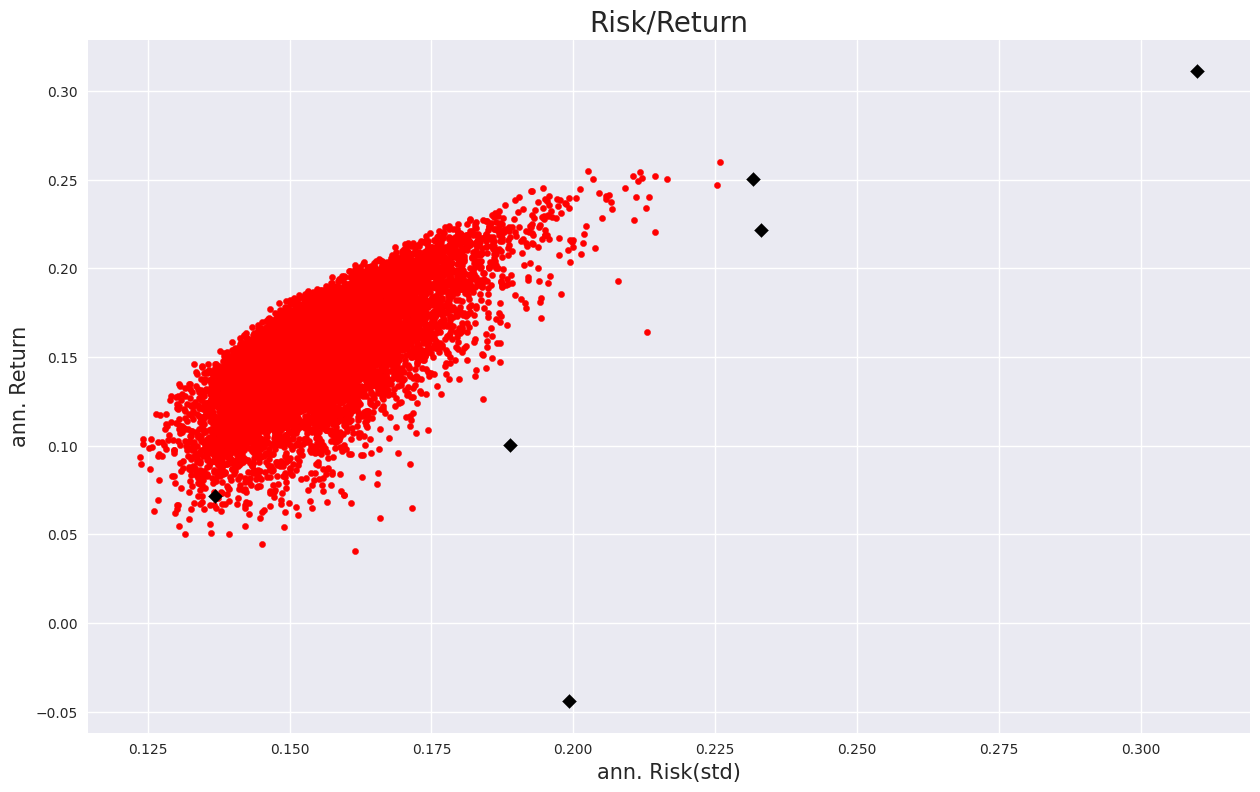

In [65]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()